<a href="https://colab.research.google.com/github/joanna-guerra/cls161/blob/main/Gibbon_Locations_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Google's Colaboratory Notebooks
The webpage you are looking at is an example of a Colab notebook. Notebooks are a convenient way to write and execute Python code. Google's Colab notebooks provide the extra benefit of installing packages and running code on the cloud, rather than on your own CPU.

### First steps:
Navigate to "File" and select "Save a copy in Drive."
Navigate to "Edit", select "Notebook settings" and make sure that "Runtime type" is set to "Python 3."

### Creating code and text cells
Colab notebooks are divided into cells which can contain either text or Python code. Although I have created all the cells we will be using for this workshop, it may be helpful to learn how to add cells of your own.

If you hover your mouse at the top or bottom of an already existing cell, you will have an option of adding a new code or text cell. Additionally, you can select the three dots on the right side of a cell for more options.

### Running code cells
There are two ways to run code cells:

Click the "play" button on the left side of the code cell
Press SHIFT+RETURN (or SHIFT+ENTER)

In [1]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 35.9 MB/s eta 0:00:00


In [14]:
import os
import pandas as pd
import stanza

In [3]:
! git clone https://github.com/jdeen33/Gibbon_text.git

Cloning into 'Gibbon_text'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 71
Receiving objects: 100% (74/74), 4.20 MiB | 13.32 MiB/s, done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Files in Google Colab**

Click this folder icon on the left to see your file directory
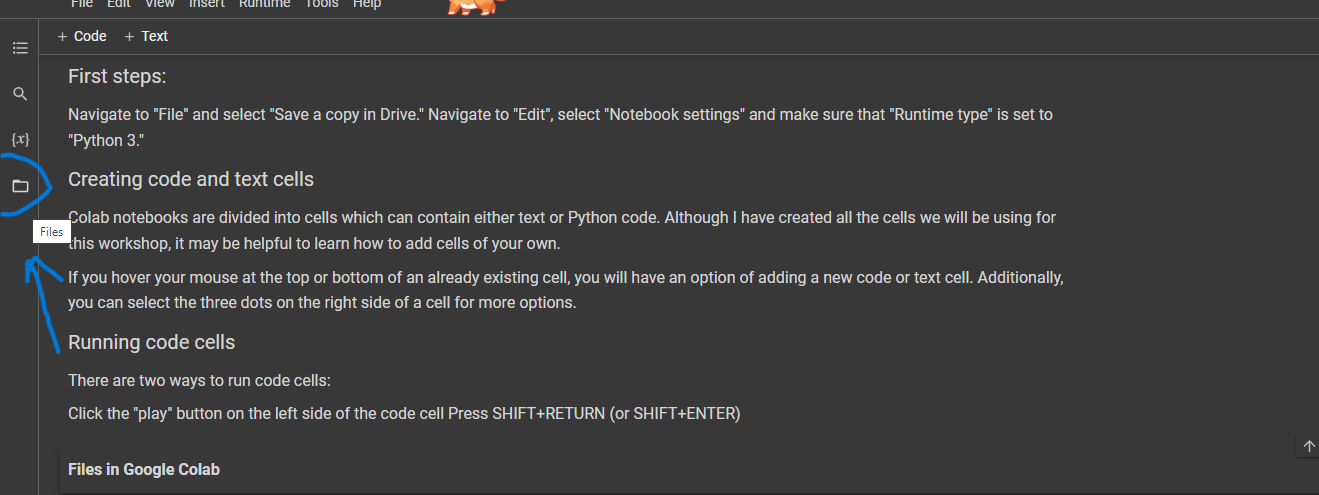


After we cloned my github repository (which contains text files of every chapter in Gibbon) We should now see this 'Gibbon_text' folder. Click on that tiny triangle to the left to 'open' the file and see what is inside



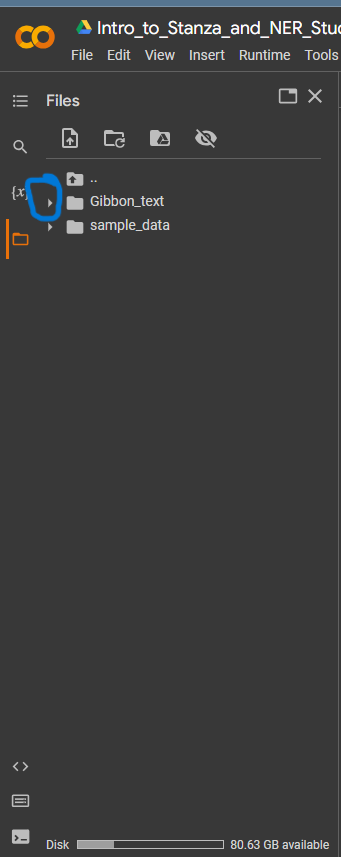

To get to access the filepath of a file in your directory, click on these three tiny dots all the way to the right that appear when you hover over the file with your mouse

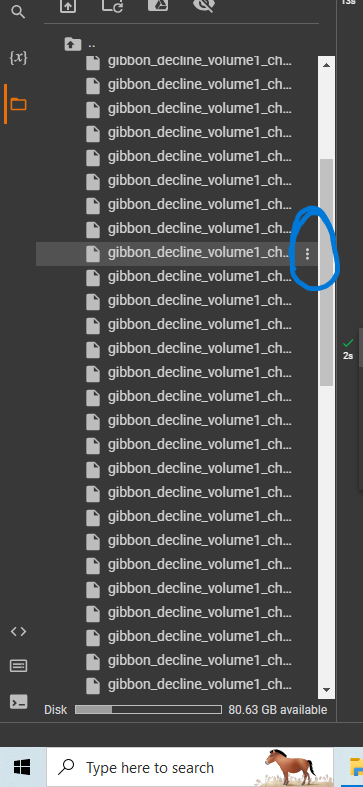

Then, select 'copy path' - this will be the path you paste into the
'mychapterfile=' variable in the next code block. Choose any chapter you are interested in exploring !


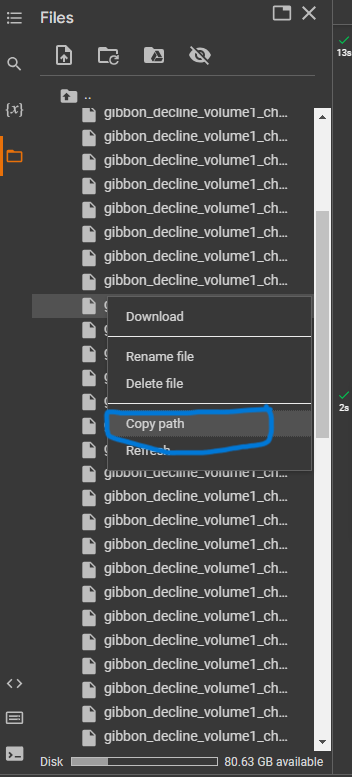

In [5]:

mychapterfile= '/content/Gibbon_text/gibbon_decline_volume1_chap21.txt'
with open(mychapterfile, encoding='utf-8', mode='r') as f:
       mychapter  = f.read()    #replace my chapter with name for variable

In [6]:
#sanity check
mychapter #also replace with whatever variable name you chose above ^^^

' Persecution of heresy — The Schism of the Donatists — The Arian Controversy — Athanasius — Distracted state of the Church and the Empire under Constantine and his sons — Toleration of Paganism \n THE grateful applause of the clergy has consecrated the memory of a prince, who indulged their passions and promoted their interest. Constantine gave them security, wealth, honours, and revenge; and the support of the orthodox faith  was considered as the most sacred and important duty of the civil magistrate. The edict of Milan, the great charter of toleration, had confirmed to each individual of the Roman world the privilege of choosing and professing his own religion. But this inestimable privilege was soon violated: with the knowledge of truth the emperor imbibed the maxims of persecution; and the sects which dissented from the Catholic church were afflicted and oppressed by the triumph of Christianity. Constantine easily believed that the heretics, who presumed to dispute his opinions o

In [7]:
#parsers
#loading out NER parser

nlp_ner= stanza.Pipeline(lang='en', processors='tokenize, ner',tokenize_pretokenized=True)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package          |
--------------------------------
| tokenize  | combined         |
| ner       | ontonotes_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [8]:
#if you want to pretokenize and split your text by sentence
tokenized_chapter= mychapter.split('. ')
#replace my chapter with your actual variable

In [9]:
#creating a stanza document
#can take 3-6 mins depending on ur computer setup
#if you have pre_tokenized the text
Docs = [stanza.Document([], text=d) for d in tokenized_chapter]
Out_Docs = nlp_ner(Docs)


In [10]:
#accessing named entities for pre tokenized out_docs
Chapter21_NER=[]
for doc in Out_Docs:
    Chapter21_NER.append(doc.ents)




In [ ]:
#create a dictionary (NER_Dict) where the key is the token text and the value is the named entity tag
NER_Dict= {}    #token.text will show the text of each word, #token.ner will show NER, will == 'O' if token is not a named entity
for doc in Out_Docs:
    for sent in doc.sentences:
        for token in sent.tokens:
            NER_Dict[token.text] = token.ner
            print(f'{token.text},{token.ner}')




In [28]:
ner_frame = pd.DataFrame.from_dict(NER_Dict, orient='index', columns=['NER_tag'])  #creates a pandas dataframe from dictionary

In [29]:
ner_frame.reset_index(inplace=True)

In [30]:
ner_frame.rename(columns={'index': 'token'}, inplace=True)

In [ ]:
ner_frame